In [ ]:
import pandas as pd
import numpy as np
from numpy import mean,std

In [ ]:
dataFrame = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
                        names = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation",
                                "relationship","race","sex","capital-gain","capital-loss","hours-per-week",
                                "native-country","income"])
dataFrame.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
dataFrame.shape

(32561, 15)

In [ ]:
#checking unique values
dataFrame.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
income                2
dtype: int64

In [ ]:
#checking for null values
dataFrame.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [ ]:
#checking if there is any noisy data
dataFrame['age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64

In [ ]:
dataFrame['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [ ]:
dataFrame['fnlwgt'].value_counts()

164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64

In [ ]:
dataFrame['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [ ]:
dataFrame['education-num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

In [ ]:
dataFrame['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [ ]:
dataFrame['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
dataFrame['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [ ]:
dataFrame['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [ ]:
dataFrame['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [ ]:
dataFrame['capital-gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital-gain, Length: 119, dtype: int64

In [ ]:
dataFrame['capital-loss'].value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: capital-loss, Length: 92, dtype: int64

In [ ]:
dataFrame['hours-per-week'].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
92        1
87        1
74        1
94        1
Name: hours-per-week, Length: 94, dtype: int64

In [ ]:
dataFrame['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [ ]:
dataFrame['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [ ]:
#Dealing with noisy data
#Issue :Missing at Random
# Solution :Imputation based on the most common values

dataFrame['workclass'] = dataFrame['workclass'].replace('[\?,)]','Private', regex=True)
dataFrame['occupation'] = dataFrame['occupation'].replace('[\?,)]','Prof-specialty', regex=True)
dataFrame['native-country'] = dataFrame['native-country'].replace('[\?,)]','United-States', regex=True)

In [ ]:
#checking after dealing with noisy data
dataFrame['workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [ ]:
dataFrame['occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [ ]:
dataFrame['native-country'].value_counts()

 United-States                             29753
 Mexico                                      643
 Philippines                                 198
 Germany                                     137
 Canada                                      121
 Puerto-Rico                                 114
 El-Salvador                                 106
 India                                       100
 Cuba                                         95
 England                                      90
 Jamaica                                      81
 South                                        80
 China                                        75
 Italy                                        73
 Dominican-Republic                           70
 Vietnam                                      67
 Guatemala                                    64
 Japan                                        62
 Poland                                       60
 Columbia                                     59
 Taiwan             

In [ ]:
dataFrame['income'] = dataFrame['income'].replace('<=50K',0, regex=True)
dataFrame['income'] = dataFrame['income'].replace('>50K',1, regex=True)
dataFrame['income'].astype(int)

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
#dropping the attributes having noisy data.
dataFrame.drop(['education-num','age', 'hours-per-week', 'fnlwgt', 'capital-gain','capital-loss', 'native-country'], axis=1, inplace=True)

In [ ]:
dataFrame.to_csv("temp.csv")

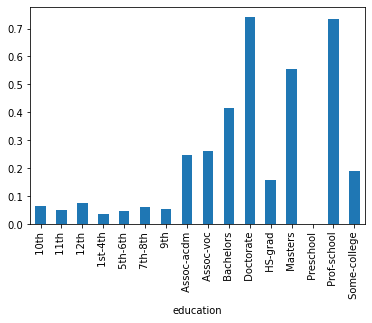

In [ ]:
#plotting a bar graph for Education against Income to see the co-relation between these columns 
dataFrame.groupby('education').income.mean().plot(kind='bar')

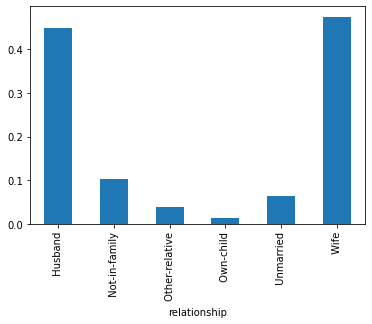

In [ ]:
#plotting a bar graph for Relation Ship against Income to see the co-relation between these columns 
dataFrame.groupby('relationship').income.mean().plot(kind='bar')

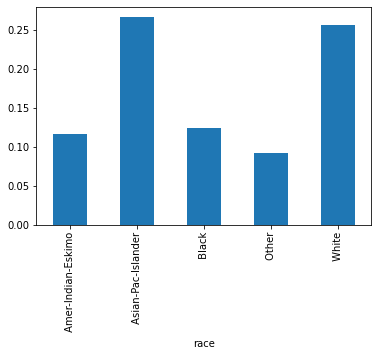

In [ ]:
#plotting a bar graph for Race against Income to see the co-relation between these columns 
dataFrame.groupby('race').income.mean().plot(kind='bar')

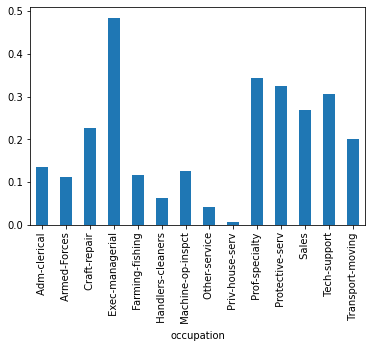

In [ ]:
#plotting a bar graph for Occupation against Income to see the co-relation between these columns 
dataFrame.groupby('occupation').income.mean().plot(kind='bar')

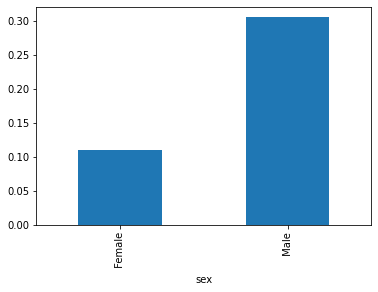

In [ ]:
#plotting a bar graph for Sex against Income to see the co-relation between these columns 
dataFrame.groupby('sex').income.mean().plot(kind='bar')

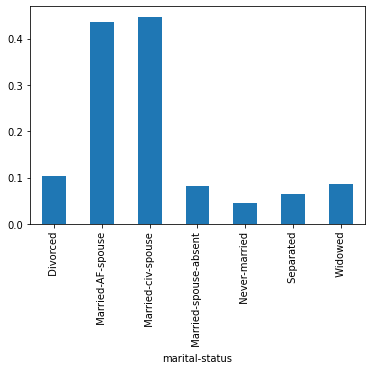

In [ ]:
#plotting a bar graph for Marital Status against Income to see the co-relation between these columns 
dataFrame.groupby('marital-status').income.mean().plot(kind='bar')

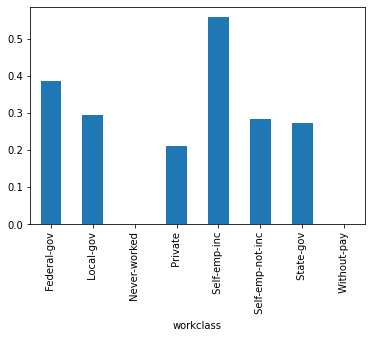

In [ ]:
#plotting a bar graph for Workclass against Income to see the co-relation between these columns 
dataFrame.groupby('workclass').income.mean().plot(kind='bar')

In [ ]:
dataFrame['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [ ]:
dataFrame.to_csv("files.csv")

In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       32561 non-null  object
 1   education       32561 non-null  object
 2   marital-status  32561 non-null  object
 3   occupation      32561 non-null  object
 4   relationship    32561 non-null  object
 5   race            32561 non-null  object
 6   sex             32561 non-null  object
 7   income          32561 non-null  object
dtypes: object(8)
memory usage: 2.0+ MB


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
plt.style.use('ggplot')
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler 

from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold,KFold, GridSearchCV

In [ ]:
#Independent variable : x. pd.DataFrame(np.c_[dataFrame['relationship'], dataFrame['education'], dataFrame['race'],dataFrame['occupation'],dataFrame['sex'],dataFrame['marital-status'],dataFrame['workclass']])
#Dependent variable : y
x = dataFrame.drop('income',axis=1)
y = dataFrame['income']

In [ ]:
#Label Encoding to convert the categorical data into numeric format
from sklearn.preprocessing import LabelEncoder

In [ ]:
tempDataFrame = dataFrame.copy()
tempDataFrame = tempDataFrame.apply(LabelEncoder().fit_transform)
tempDataFrame.head()

,workclass,education,marital-status,occupation,relationship,race,sex,income
0,6,9,4,0,1,4,1,0
1,5,9,2,3,0,4,1,0
2,3,11,0,5,1,4,1,0
3,3,1,2,5,0,2,1,0
4,3,9,2,9,5,2,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
tempDataFrame

,workclass,education,marital-status,occupation,relationship,race,sex,income
0,6,9,4,0,1,4,1,0
1,5,9,2,3,0,4,1,0
2,3,11,0,5,1,4,1,0
3,3,1,2,5,0,2,1,0
4,3,9,2,9,5,2,0,0
...,...,...,...,...,...,...,...,...
32556,3,7,2,12,5,4,0,0
32557,3,11,2,6,0,4,1,1
32558,3,11,6,0,4,4,0,0
32559,3,11,4,0,3,4,1,0


In [ ]:
standardScaler = StandardScaler().fit(tempDataFrame.drop('income',axis = 1))

In [ ]:
x = standardScaler.transform(tempDataFrame.drop('income',axis = 1))
y = dataFrame['income']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2)

In [ ]:
scaler = MinMaxScaler()
x_train  = scaler.fit_transform(x_train)
x_test  = scaler.fit_transform(x_test)

In [ ]:
y_train = y_train.astype(str).astype(int)

In [ ]:
y_test = y_test.astype(str).astype(int)

In [ ]:
def tunning():
  clf1 = DecisionTreeClassifier()
  clf2 = LogisticRegression()
  clf3 = KNeighborsClassifier()
  clf4 = RandomForestClassifier(random_state=100)
  clf5 = SVC(probability= True, random_state= 100)
  clf6 = MultinomialNB()

  param1 = {}      
  param1['classifier__max_depth'] = [5,10,25,None]     
  param1['classifier__min_samples_split'] = [2,5,10]      
  param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]      
  param1['classifier'] = [clf1]

  param2 = {}    
  param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
  param2['classifier__penalty'] = ['l2']      
  param2['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
  param2['classifier'] = [clf2]

  param3 = {}
  param3['classifier__n_neighbors'] = [2,5,10,25,50]
  param3['classifier'] = [clf3]


  param4 = {}
  param4['classifier__n_estimators'] = [10, 50, 100, 250]
  param4['classifier__max_depth'] = [5, 10, 20]
  param4['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
  param4['classifier'] = [clf4]

  param5 = {}
  param5['classifier__C'] = [100]
  param5['classifier__kernel'] = ['rbf']
  param5['classifier__gamma'] = [1]
  param5['classifier'] = [clf5]

  param6 = {}
  param6['classifier__alpha'] = [10**0, 10**1, 10**2]
  param6['classifier'] = [clf6]

  pipeline = Pipeline([('classifier', clf1)])
  params = [param1, param2, param3, param4, param5, param6]

  gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='roc_auc').fit(x_train, y_train)

  return (str(gs.best_params_) + "\n" + str(gs.best_score_))

In [ ]:
models = []
names = ['Decision Tree', 'LogisticRegression','KNN','RandomForest','Support Vector Machine','Navie Bayes']
models.append(DecisionTreeClassifier())
models.append(LogisticRegression())
models.append(KNeighborsClassifier())
models.append(RandomForestClassifier(n_estimators=100))
models.append(SVC())
models.append(MultinomialNB())


In [ ]:
def modelEvalute() :
  for model in models:
    kfold = KFold(n_splits = 10)
    cvResults = cross_val_score(model,x_train,y_train,cv = kfold,scoring= 'accuracy')
    
    return cvResults

In [ ]:
def rocNConfusionMatrix():
  for model in models :
    modelfit = model.fit(x_train, y_train)
    modelScore = modelfit.score(x_test,y_test)
    prediction = modelfit.predict(x_test)
    if (str(model) == "SVC()"):
      falsePositiveRate, truePositiveRate, thresholds = roc_curve(y_test, prediction)
    else :
      y_pred_probability = modelfit.predict_proba(x_test)[:,1]
    falsePositiveRate, truePositiveRate, thresholds = roc_curve(y_test, y_pred_probability)
    plt.plot([0,1],[0,1],'--')
    plt.plot(falsePositiveRate,truePositiveRate, label= str(model))
    plt.xlabel('falsePositiveRate')
    plt.ylabel('truePositiveRate')
    plt.title('ROC curve')
    print('\033[0m'+str(model) +'\033[0m')
    print('The accuracy of :'+ str(model) +":", modelScore)
    print('Confusion Matrix :' + str(model) +":", confusion_matrix(y_test, prediction))
    plt.show() 

In [ ]:
def modelWrap():
  print(tunning())
  cvResults = modelEvalute()
  for name in names:
    print(str(name)+ ":" + str(cvResults.mean()) + ":" + str(cvResults.std()))
  rocNConfusionMatrix()

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


{'classifier': RandomForestClassifier(max_depth=10, n_estimators=250, random_state=100), 'classifier__class_weight': None, 'classifier__max_depth': 10, 'classifier__n_estimators': 250}
0.8712445047817967
Decision Tree:0.8179772464832326:0.004063416916628306
LogisticRegression:0.8179772464832326:0.004063416916628306
KNN:0.8179772464832326:0.004063416916628306
RandomForest:0.8179772464832326:0.004063416916628306
Support Vector Machine:0.8179772464832326:0.004063416916628306
Navie Bayes:0.8179772464832326:0.004063416916628306
DecisionTreeClassifier()
The accuracy of :DecisionTreeClassifier(): 0.8234571691740866
Confusion Matrix :DecisionTreeClassifier(): [[2237  207]
 [ 368  445]]


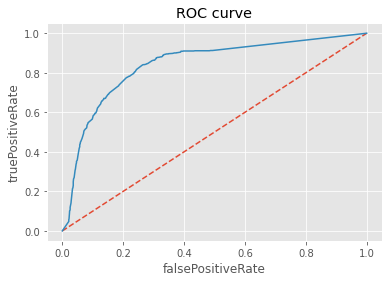

LogisticRegression()
The accuracy of :LogisticRegression(): 0.7470064476512128
Confusion Matrix :LogisticRegression(): [[2429   15]
 [ 809    4]]


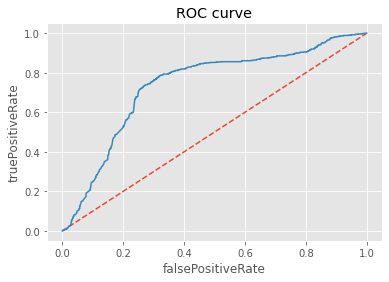

KNeighborsClassifier()
The accuracy of :KNeighborsClassifier(): 0.8136321768498619
Confusion Matrix :KNeighborsClassifier(): [[2224  220]
 [ 387  426]]


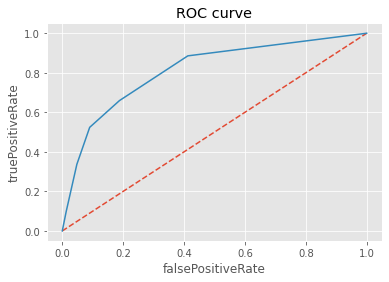

RandomForestClassifier()
The accuracy of :RandomForestClassifier(): 0.828983727356463
Confusion Matrix :RandomForestClassifier(): [[2256  188]
 [ 369  444]]


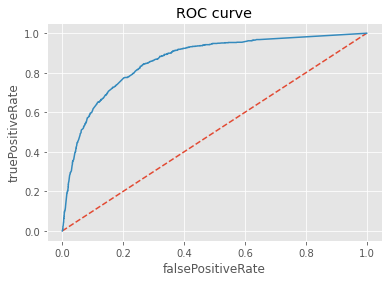

SVC()
The accuracy of :SVC(): 0.7559103469450414
Confusion Matrix :SVC(): [[2411   33]
 [ 762   51]]


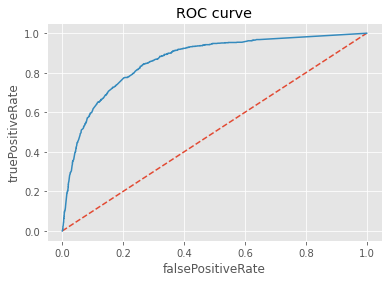

MultinomialNB()
The accuracy of :MultinomialNB(): 0.750383788762665
Confusion Matrix :MultinomialNB(): [[2444    0]
 [ 813    0]]


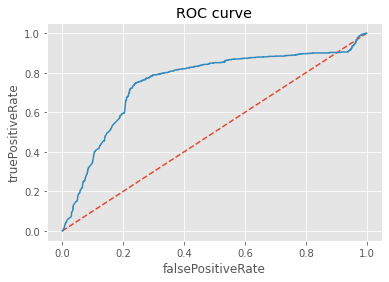

In [ ]:
modelWrap()